# Politecnico Malvinas Argentinas- PDH: Preprocesamiento, Normalización y Técnicas Básicas

In [1]:
# Instalación de librerías necesarias (si es necesario en Colab)
!pip install nltk spacy scikit-learn thefuzz stop_words
!pip install fuzzywuzzy python-Levenshtein

import re
import nltk
import spacy
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ivan_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivan_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Cargar modelo en español de spaCy
!python -m spacy download es_core_news_md
nlp = spacy.load("es_core_news_md")

     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.3/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.3/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.3/42.3 MB ? eta -:--:--
     --------------------------------------- 0.5/42.3 MB 524.3 kB/s eta 0:01:20
      -------------------------------------- 0.8/42.3 MB 599.2 kB/s eta 0:01:10
      -------------------------------------- 0.8/42.3 MB 599.2 kB/s eta 0:01:10
      -------------------------------------- 1.0/42.3 MB 645.1 kB/s eta 0:01:04
     - ------------------------------------- 1.3/42.3 MB 677.8 kB/s eta 0:01:01
     - ------------------------------------- 1.3/42.3 MB 677.8 kB/s eta 0:01:01
     - ------------------------------------- 1.6/42.3 MB 705.1 kB/s eta 0:00:58
     - -

# 1. Preprocesamiento de texto

# Tokenizacion

Quizás una de las operaciones más básicas que podemos hacer es contar palabras. Imaginemos un caso extremadamente sencillo relacionado al aprendizaje automático. Pensemos en un clasificador de positividad / negatividad.

Podríamos usar una regla como:

si "bueno" está en el texto, clasificamos como positivo.

Claramente un enfoque tan sencillo va a ser propenso a muchos errores. Iremos viendo cómo aplicarlo y mejorarlo.

La operación de separar los textos en unidades básicas (o tokens) la llamamos tokenización.

In [44]:
doc2 = 'Pensar es fácil, actuar difícil, y poner los pensamientos propios en acción, lo más difícil del mundo.'
doc2.split(' ')

['Pensar',
 'es',
 'fácil,',
 'actuar',
 'difícil,',
 'y',
 'poner',
 'los',
 'pensamientos',
 'propios',
 'en',
 'acción,',
 'lo',
 'más',
 'difícil',
 'del',
 'mundo.']

Vemos que en castellano, el lenguaje natural (escrito) puede tener distintas fuentes de variaciones:

Mayúsculas
Tildes
Signos ortográficos
Errores de tipeo
Variaciones propias del lenguaje como la conjugación
Artefactos de la escritura informal como "holaaa"
¿Cómo abordarán esto nuestros algorítmos?

Una solución es la normalización: con acepción similar aunque distinta a la que usamos en estadística, va a significar transformar a los strings a representaciones iguales.

Podemos:

Sacar espacios
Pasar a minúsculas
Quitar tildes

In [5]:
%%capture
!pip install unidecode

In [45]:
import unidecode
[unidecode.unidecode(w.lower().strip()) for w in doc2.split(' ')]

['pensar',
 'es',
 'facil,',
 'actuar',
 'dificil,',
 'y',
 'poner',
 'los',
 'pensamientos',
 'propios',
 'en',
 'accion,',
 'lo',
 'mas',
 'dificil',
 'del',
 'mundo.']

Otras normalizaciones más sofisticadas serían:
- Pasar de plural a singular
- Convertir el género de la palabra
- Conjugar los verbos en infinitivo

¡Es de esperarse que esto requiera métodos más complejos!

Vemos que con la tokenización anterior, todavía tenemos palabras con signos de puntuación pegados. Armar nuestro vocabulario es un paso clave para nuestros modelos de *Machine Learning*. 

In [7]:
import nltk
from nltk.tokenize import word_tokenize

In [8]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ivan_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [46]:

text = "La inteligencia consiste no sólo en el conocimiento, sino también en la destreza de aplicar los conocimientos en la práctica."

# Tokenización y Normalización
words = word_tokenize(text.lower())
print("Tokenización y Normalización:", words)

Tokenización y Normalización: ['la', 'inteligencia', 'consiste', 'no', 'sólo', 'en', 'el', 'conocimiento', ',', 'sino', 'también', 'en', 'la', 'destreza', 'de', 'aplicar', 'los', 'conocimientos', 'en', 'la', 'práctica', '.']


In [47]:
# Expresiones Regulares
text_clean = re.sub(r'[^a-zA-Záéíóúüñ ]', '', text.lower())
print("Texto limpio con regex:", text_clean)



Texto limpio con regex: la inteligencia consiste no sólo en el conocimiento sino también en la destreza de aplicar los conocimientos en la práctica


In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivan_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
# Stop Words
stop_words = set(stopwords.words('spanish'))
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
print("Sin Stop Words:", filtered_words)

Sin Stop Words: ['inteligencia', 'consiste', 'sólo', 'conocimiento', 'sino', 'destreza', 'aplicar', 'conocimientos', 'práctica']


In [13]:
# Se uso word.isalpha() para eliminar signos de puntuación

Una posible mejora es el uso de una función para la tokenización y la normalización, para mejorarar la reutilización y legilibilidad del código:

In [39]:
def tokenizar_y_normalizar(texto):
    palabras = word_tokenize(texto.lower())
    return palabras

Función para eliminar Stop Words:

In [40]:
def eliminar_stop_words(palabras):
    stop_words = set(stopwords.words('spanish'))
    return [palabra for palabra in palabras if palabra.isalpha() and palabra not in stop_words]

Ejemplo de uso de estas funciones para la mejora del código podría ser:

In [49]:
texto = "La inteligencia consiste no sólo en el conocimiento, sino también en la destreza de aplicar los conocimientos en la práctica."
palabras = tokenizar_y_normalizar(texto)
palabras_sin_stop = eliminar_stop_words(palabras)
print("Sin Stop Words:", palabras_sin_stop)

Sin Stop Words: ['inteligencia', 'consiste', 'sólo', 'conocimiento', 'sino', 'destreza', 'aplicar', 'conocimientos', 'práctica']


# 2. Técnicas de NLP con NLTK y spaCy

In [14]:
from nltk.stem.snowball import SnowballStemmer

In [50]:
# Stemming con NLTK
stemmer = SnowballStemmer("spanish")
stemmed_words = [stemmer.stem(word) for word in filtered_words]
print("Stemming:", stemmed_words)


Stemming: ['inteligent', 'cons', 'sol', 'conoc', 'sin', 'destrez', 'aplic', 'conoc', 'practic']


In [51]:
# Lemmatización con spaCy
doc = nlp(" ".join(filtered_words))
lemmas = [token.lemma_ for token in doc]
print("Lemmatización:", lemmas)

Lemmatización: ['inteligencia', 'consistir', 'sólo', 'conocimiento', 'sino', 'destreza', 'aplicar', 'conocimiento', 'práctico']


In [17]:
!pip install nltk spacy scikit-learn thefuzz stop_words
!pip install fuzzywuzzy python-Levenshtein

In [18]:
from fuzzywuzzy import fuzz

In [19]:
# Distancias entre strings
print("Distancia fuzzy entre 'casa' y 'casas':", fuzz.ratio("casa", "casas"))
texts = ["El gato come pescado", "El perro ladra en la casa"]

Distancia fuzzy entre 'casa' y 'casas': 89


In [20]:
# segundo ejemplo %%capture
!pip install pyjarowinkler
from nltk.metrics import edit_distance
from pyjarowinkler import distance as jwdist

In [52]:
# Definimos una lista de tuplas de palabras
palabras = [("hola", "ola"),("hay", "ay"), ("vaya", "valla"),  ("totalmente","diferentes"), ("ola", "vaya")]

# Calculamos las metricas de distancia pasando cada tupla como argumentos a levdist() y get_jaro_distance()
for x,y in palabras:
    print(f"'{x}' vs '{y}':")
    print("Distancia Levenshtein ->", edit_distance(x,y))
    print("Similitud Jaro Winkler ->",jwdist.get_jaro_distance(x,y))
    print("-"*40)

'hola' vs 'ola':
Distancia Levenshtein -> 1
Similitud Jaro Winkler -> 0.08
----------------------------------------
'hay' vs 'ay':
Distancia Levenshtein -> 1
Similitud Jaro Winkler -> 1.0
----------------------------------------
'vaya' vs 'valla':
Distancia Levenshtein -> 2
Similitud Jaro Winkler -> 0.22
----------------------------------------
'totalmente' vs 'diferentes':
Distancia Levenshtein -> 7
Similitud Jaro Winkler -> 0.48
----------------------------------------
'ola' vs 'vaya':
Distancia Levenshtein -> 3
Similitud Jaro Winkler -> 0.47
----------------------------------------


# 3. Vectorización y Representación del Texto

In [25]:
!pip install pandas
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.5 MB 3.3 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.5 MB 3.6 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.5 MB 3.7 MB/s eta 0:00:03
   ------------ --------------------------- 3.7/11.5 MB 4.0 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.5 MB 4.3 MB/s eta 0:00:02
   ---------------------- ----------------- 6.6/11.5 MB 4.7 MB/s eta 0:00:02
   -------------------------- ------------- 7.6/11.5 MB 4.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.9/11.5 MB 4.9 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.5 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 5.1 MB/s eta 0:00:01
   -------

In [26]:
texts = ["El gato come pescado", "El perro ladra en la casa"]

In [27]:
# Bolsa de Palabras (BoW)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


casa  come  el  en  gato  la  ladra  perro  pescado
0     0     1   1   0     1   0      0      0        1
1     1     0   1   1     0   1      1      1        0

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(texts)
pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

casa      come        el       en      gato       la    ladra    perro  \
0  0.00000  0.534046  0.379978  0.00000  0.534046  0.00000  0.00000  0.00000   
1  0.42616  0.000000  0.303216  0.42616  0.000000  0.42616  0.42616  0.42616   

    pescado  
0  0.534046  
1  0.000000

In [31]:
# N-gramas
vectorizer_ngram = CountVectorizer(ngram_range=(2,3), min_df=1)
X_ngram = vectorizer_ngram.fit_transform(texts)
pd.DataFrame(X_ngram.toarray(), columns=vectorizer_ngram.get_feature_names_out())


come pescado  el gato  el gato come  el perro  el perro ladra  en la  \
0             1        1             1         0               0      0   
1             0        0             0         1               1      1   

   en la casa  gato come  gato come pescado  la casa  ladra en  ladra en la  \
0           0          1                  1        0         0            0   
1           1          0                  0        1         1            1   

   perro ladra  perro ladra en  
0            0               0  
1            1               1

Se podría mejorar el código aportando visualizaciones de los resultados utilizando bibliotecas como Matplotlib o Seaborn:

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 2.6 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 2.3 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.3 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.3 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.3 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 1.7 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 1.8 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 1.9 MB/s eta 0:00:03
   ---------------------- ----------------- 4.5/8.1 MB 2.0 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 1.9 MB/s eta 0:00:02
   -----------------------

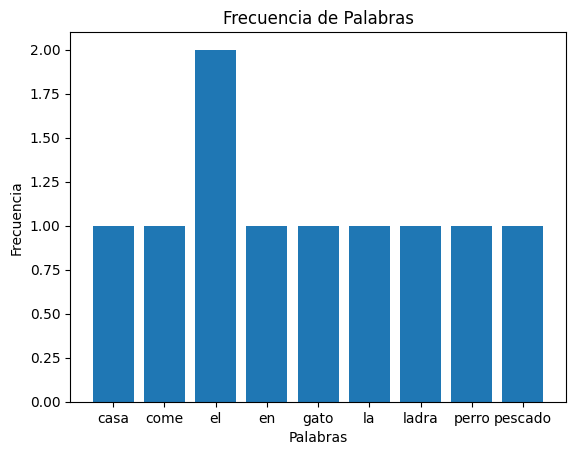

In [43]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Ejemplo de visualización
frecuencias = vectorizer.get_feature_names_out()
frecuencias_count = X.toarray().sum(axis=0)

plt.bar(frecuencias, frecuencias_count)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Palabras')
plt.show()

# 4. Tareas Avanzadas con spaCy

In [53]:
sentence = "La pluma es más poderosa que la espada."
doc = nlp(sentence)


In [54]:
# POS Tagging
print([(token.text, token.pos_) for token in doc])

[('La', 'DET'), ('pluma', 'NOUN'), ('es', 'AUX'), ('más', 'ADV'), ('poderosa', 'ADJ'), ('que', 'SCONJ'), ('la', 'DET'), ('espada', 'NOUN'), ('.', 'PUNCT')]


In [55]:
# Named Entity Recognition (NER)
print([(ent.text, ent.label_) for ent in doc.ents])

[]


In [36]:
from spacy import displacy

In [37]:
# Dependencias sintácticas
displacy.render(doc, style='dep', jupyter=True)

In [38]:

# Limitaciones de Bolsa de Palabras
print("BoW no captura el significado de las palabras ni el orden de las mismas.")

BoW no captura el significado de las palabras ni el orden de las mismas.
